In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ror_fpath = "/mnt/c/Users/pmcw9/Delta-E/PICS/PyPSA_BC/results/interim/bc_ror_power_series.csv"
inflow_fpath = "/mnt/c/Users/pmcw9/Delta-E/PICS/PyPSA_BC/results/interim/reservoir_inflows.csv"

ror_df = pd.read_csv(ror_fpath,index_col=0)
ror_df.index = pd.to_datetime(ror_df.index)

inflow_df = pd.read_csv(inflow_fpath,index_col=0)
inflow_df.index = pd.to_datetime(inflow_df.index)

### Inflow

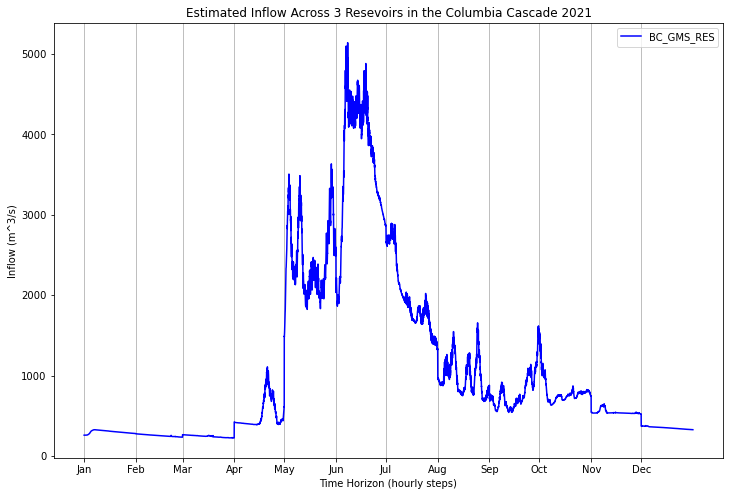

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
# fig.figsize(12,8)

# plt.figure(figsize=(12,8))
ax.plot(inflow_df['BC_GMS_RES'] / 3600, color='b',label='BC_GMS_RES')
# ax.plot(inflow_df['BC_REV_RES'] / 3600, color='r',label='BC_REV_RES')
# ax.plot(inflow_df['BC_ALH_RES'] / 3600, color='c',label='BC_ALH_RES')


# Formatting options
ax.legend()
plt.xlabel('Time Horizon (hourly steps)')
plt.ylabel('Inflow (m^3/s)')
plt.title('Estimated Inflow Across 3 Resevoirs in the Columbia Cascade 2021')
plt.grid(axis='x')
xticks = ['2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00', '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
          '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00']
xtick_labels = month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels(xtick_labels)

### RoR Power

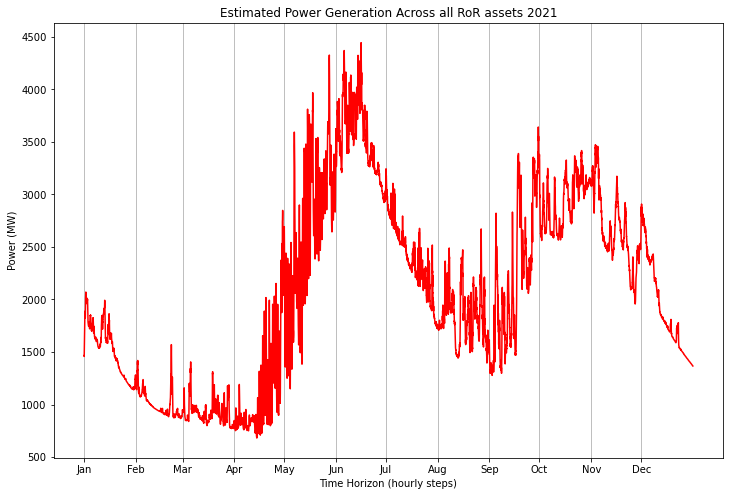

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
# fig.figsize(12,8)

# plt.figure(figsize=(12,8))
ax.plot(ror_df.sum(axis=1), color='r')

# Formatting options
plt.xlabel('Time Horizon (hourly steps)')
plt.ylabel('Power (MW)')
plt.title('Estimated Power Generation Across all RoR assets 2021')
plt.grid(axis='x')
xticks = ['2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00', '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
          '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00']
xtick_labels = month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels(xtick_labels)

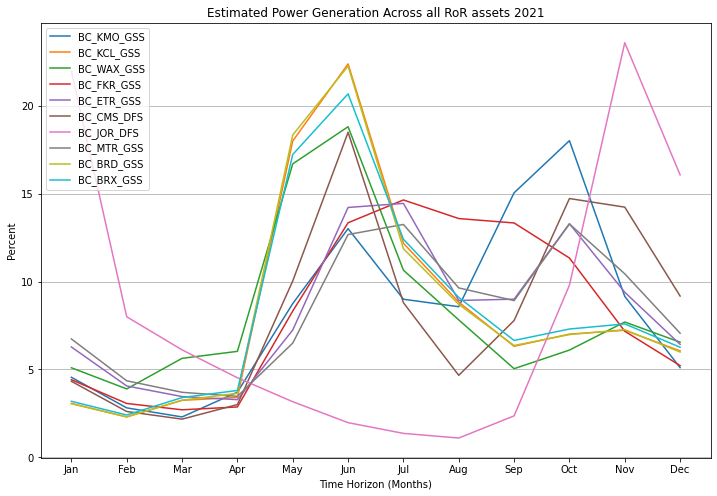

In [77]:
# mask = (inflow_df.index.month == 5)
# inflow_df[mask] #['BC_ALH_RES'].apply(lambda x: x / 3600).mean()
# pd.Series(inflow_df).index#.dt.month_name()#.rename('month')
temp = ror_df.groupby([ror_df.index.to_series().dt.month]).sum() #.dt.month_name().rename('month')
ror_percent = (temp / temp.sum(axis=0)) * 100

col_list = ror_df.sum(axis=0).sort_values(ascending=False).index[:10] # top 10 sites by production
fig, ax = plt.subplots(figsize=(12,8))
for col in col_list:
    ax.plot(ror_percent[col],label=col)

# Formatting options
plt.xlabel('Time Horizon (Months)')
plt.ylabel('Percent')
plt.title('Estimated Power Generation Across all RoR assets 2021')
plt.grid(axis='y')
plt.legend()
xticks = [1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels(xtick_labels)

### BC Hydro Load and Scheduled Flow

In [46]:
load_fpath = "/mnt/c/Users/pmcw9/Delta-E/PICS/Data/BCH/BalancingAuthorityLoad2021.csv"
trade_fpath = "/mnt/c/Users/pmcw9/Delta-E/PICS/Data/BCH/ScheduledInterchange2021.csv"
load_df = pd.read_csv(load_fpath)
load_df.index =  ror_df.index
trade_df = pd.read_csv(trade_fpath)
trade_df.index =  ror_df.index
trade_df = trade_df[['US Tielines','AB Tielines']]

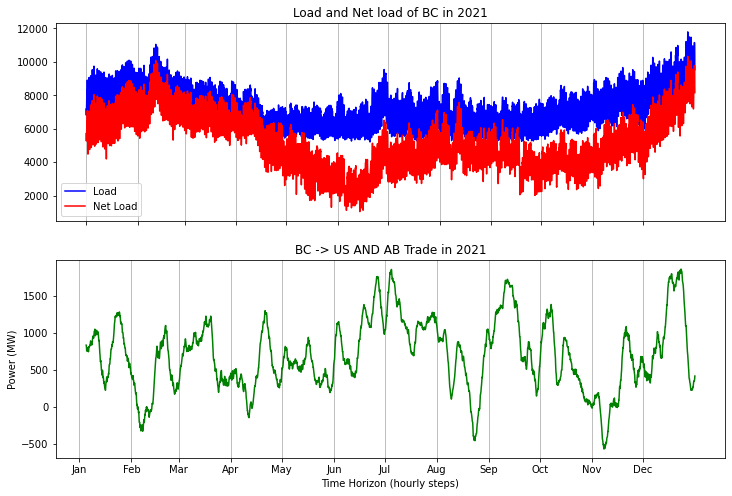

In [79]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
ws = 100
# fig.figsize(12,8)

# plt.figure(figsize=(12,8))

avg_trade = trade_df.rolling(window=ws).mean().iloc[ws-1:]


ax[0].plot(load_df['Control Area Load'], color='b', label='Load')
ax[0].plot(load_df['Control Area Load'] - ror_df.sum(axis=1), color='r', label='Net Load')
ax[1].plot(avg_trade.sum(axis=1),color='g')

# Formatting options
plt.xlabel('Time Horizon (hourly steps)')
plt.ylabel('Power (MW)')
# plt.legend()
# plt.title('Load and Net load of BC in 2021')
ax[0].grid(axis='x')
ax[1].grid(axis='x')
xticks = ['2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00', '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
          '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00']
xtick_labels = month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
ax[0].legend()
ax[0].set_title('Load and Net load of BC in 2021')
ax[1].set_title('BC -> US AND AB Trade in 2021')
_ = ax[0].set_xticks(xticks)
_ = ax[0].set_xticklabels([" "]*len(xticks))
_ = ax[1].set_xticks(xticks)
_ = ax[1].set_xticklabels(xtick_labels)

### Regional plots of RoR
    i) 
    ii) 

In [112]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import matplotlib.patches as mpatches
from shapely.geometry import Point

In [100]:
vi_gdf = gpd.read_file("/mnt/c/Users/pmcw9/Delta-E/PICS/Data/regions/VI.geojson")

/home/pmcwhannel/anaconda3/envs/bc-power/lib/python3.10/site-packages/cartopy/feature/__init__.py:217: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._geoms = tuple(geometries)
/home/pmcwhannel/anaconda3/envs/bc-power/lib/python3.10/site-packages/cartopy/feature/__init__.py:217: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  self._geoms = tuple(geometries)


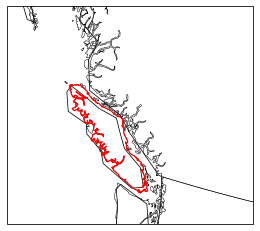

In [99]:
bounds = [-130,-120,48,53]
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent(bounds, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.75)
ax.add_feature(cfeature.STATES, linewidth=0.5)

# poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="yellow", transform=ccrs.Geodetic())
# ax.add_patch(poly)
feature = cfeature.ShapelyFeature(vi_gdf['geometry'].iloc[0], ccrs.PlateCarree())
# ax.add_geometries(vi_gdf['geometry'].iloc[0], crs=ccrs.LambertConformal(), facecolor='b')
ax.add_feature(feature, facecolor='none', edgecolor='red')

In [102]:
hydro_df = pd.read_csv("/mnt/c/Users/pmcw9/Delta-E/PICS/PyPSA_BC/results/interim/hydro_generation.csv")

In [138]:
aid_2_coords = {}
for idx,row in hydro_df.iterrows():
    aid = row['asset_id']
    if aid not in aid_2_coords:
        aid_2_coords[aid] = (row['longitude'], row['latitude'])

In [139]:
vi_aid_list = []
for aid in ror_df.columns:
    lon,lat = aid_2_coords[aid]
    if vi_gdf['geometry'].iloc[0].contains(Point(lon,lat)): # The facility is inside Vancouver island
        vi_aid_list.append(aid)

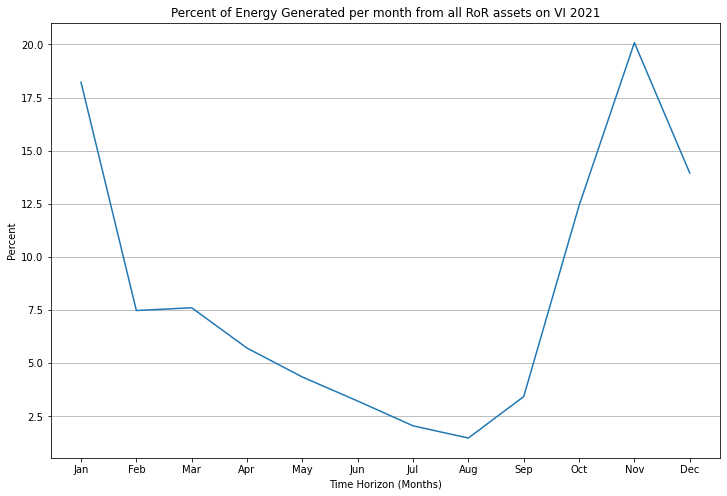

In [140]:
## Calculations
ror_vi = ror_df[vi_aid_list].sum(axis=1)
temp = ror_vi.groupby([ror_vi.index.to_series().dt.month]).sum() #.dt.month_name().rename('month')
ror_vi_percent = (temp / temp.sum(axis=0)) * 100


## Plotting
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(ror_vi_percent)

# Formatting options
plt.xlabel('Time Horizon (Months)')
plt.ylabel('Percent')
plt.title('Percent of Energy Generated per month from all RoR assets on VI 2021')
plt.grid(axis='y')
# plt.legend()
xticks = [1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels(xtick_labels)

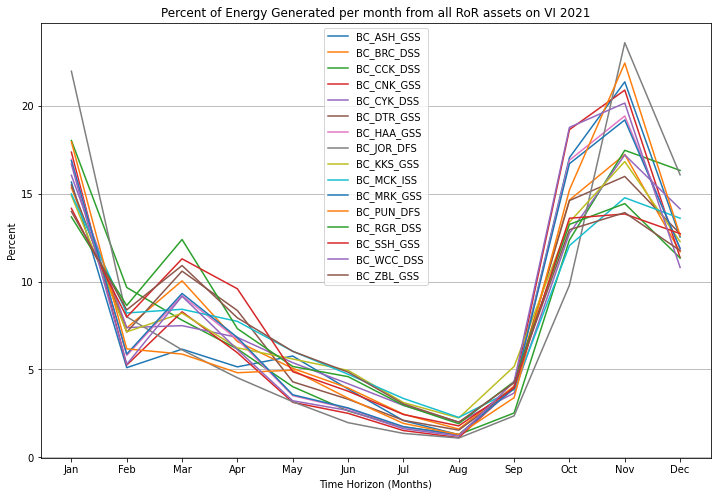

In [148]:
# Calculations
temp = ror_df[vi_aid_list].groupby([ror_df[vi_aid_list].index.to_series().dt.month]).sum() #.dt.month_name().rename('month')
ror_percent = (temp / temp.sum(axis=0)) * 100

# col_list = ror_df.sum(axis=0).sort_values(ascending=False).index[:10] # top 10 sites by production
fig, ax = plt.subplots(figsize=(12,8))
for col in vi_aid_list:
    ax.plot(ror_percent[col],label=col)

# Formatting options
plt.xlabel('Time Horizon (Months)')
plt.ylabel('Percent')
plt.title('Percent of Energy Generated per month from all RoR assets on VI 2021')
plt.grid(axis='y')
plt.legend()
xticks = [1,2,3,4,5,6,7,8,9,10,11,12]
xtick_labels = month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
_ = ax.set_xticks(xticks)
_ = ax.set_xticklabels(xtick_labels)